In [21]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plot
import numpy as np

##### Importamos datos históricos del valor del dólar oficial (fuente: BCRA)

In [10]:
# Cargar el DataFrame desde el archivo Excel
dolar = pd.read_excel(r"../CotizacionesBCRA.xlsx")

# Asegúrate de que la columna 'fecha' sea del tipo datetime
dolar['fecha'] = pd.to_datetime(dolar['fecha'])

# Eliminar duplicados basados en la columna 'fecha'
dolar = dolar.drop_duplicates(subset=['fecha'])

# Establecer las fechas como índice
dolar.set_index('fecha', inplace=True)

# Crear un rango de fechas desde el 1/1/2007 hasta el 11/06/2023
rango_fechas = pd.date_range(start='2007-01-01', end='2023-10-30', freq='D')

# Reindexar el DataFrame con el rango de fechas completo
dolar_reindexado = dolar.reindex(rango_fechas)

# Rellenar los valores faltantes utilizando el método forward fill (ffill)
dolar_reindexado['valor'] = dolar_reindexado['valor'].ffill()

# Si deseas guardar el resultado en un nuevo archivo CSV
# dolar_reindexado.to_csv('datos_actualizados.csv')

# Verificar el DataFrame actualizado
dolar_reindexado = dolar_reindexado.reset_index()
dolar_reindexado.info()
dolar_reindexado.columns = ['ds', 'y']
dolar_reindexado


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6147 entries, 0 to 6146
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   6147 non-null   datetime64[ns]
 1   valor   6147 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 96.2 KB


,ds,y
0,2007-01-01,3.058
1,2007-01-02,3.058
2,2007-01-03,3.059
3,2007-01-04,3.072
4,2007-01-05,3.078
...,...,...
6142,2023-10-26,349.950
6143,2023-10-27,349.950
6144,2023-10-28,349.950
6145,2023-10-29,349.950


In [11]:
modelo_dolar = Prophet()
modelo_dolar.fit(dolar_reindexado)

09:56:18 - cmdstanpy - INFO - Chain [1] start processing
09:56:20 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future = modelo_dolar.make_future_dataframe(periods=1827)
future = future[future['ds'] < '2028-06-12']
future

,ds
0,2007-01-01
1,2007-01-02
2,2007-01-03
3,2007-01-04
4,2007-01-05
...,...
7828,2028-06-07
7829,2028-06-08
7830,2028-06-09
7831,2028-06-10


In [16]:
forecast = modelo_dolar.predict(future)

In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2007-01-01,0.923979,-21.430545,20.371205
1,2007-01-02,0.868228,-21.127650,21.781766
2,2007-01-03,0.935103,-21.094655,21.085561
3,2007-01-04,0.987515,-20.006037,21.483944
4,2007-01-05,1.020685,-20.060594,22.066882
...,...,...,...,...
7828,2028-06-07,538.083510,457.464445,611.647522
7829,2028-06-08,538.263728,458.038179,615.780905
7830,2028-06-09,538.427390,457.059553,613.146620
7831,2028-06-10,538.552509,452.423932,614.707789


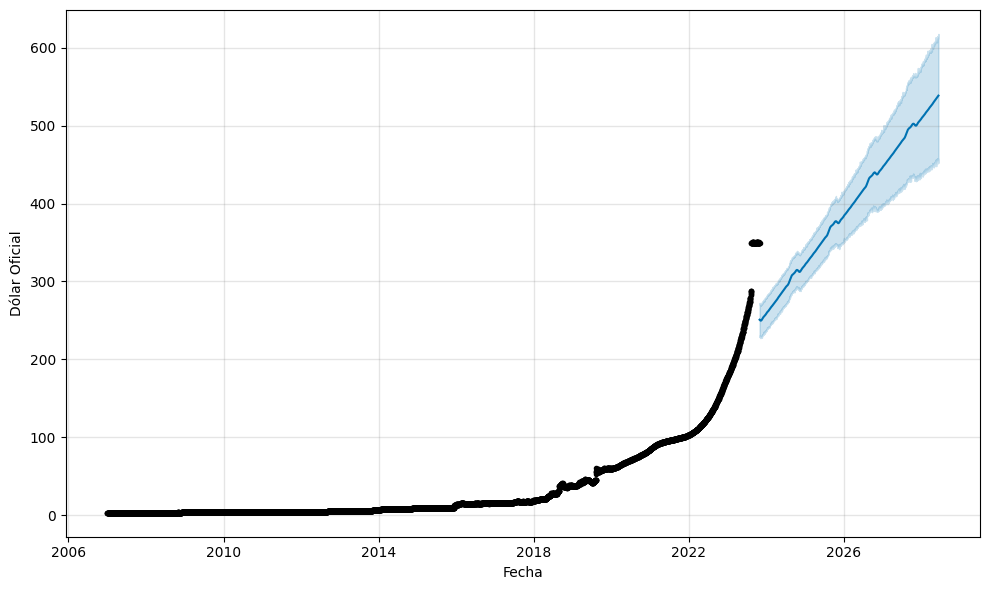

In [18]:
fig1 = modelo_dolar.plot(forecast[forecast['ds'] > '2023-10-30'], xlabel='Fecha', ylabel='Dólar Oficial')

### Prediccion del dolar con pycaret

In [25]:
# Cargar el DataFrame desde el archivo Excel
dolar = pd.read_excel(r"../CotizacionesBCRA.xlsx")

# Asegúrate de que la columna 'fecha' sea del tipo datetime
dolar['fecha'] = pd.to_datetime(dolar['fecha'])

# Eliminar duplicados basados en la columna 'fecha'
dolar = dolar.drop_duplicates(subset=['fecha'])

# Establecer las fechas como índice
dolar.set_index('fecha', inplace=True)

# Crear un rango de fechas desde el 1/1/2007 hasta el 11/06/2023
rango_fechas = pd.date_range(start='2007-01-01', end='2023-10-30', freq='D')

# Reindexar el DataFrame con el rango de fechas completo
dolar_reindexado = dolar.reindex(rango_fechas)

# Rellenar los valores faltantes utilizando el método forward fill (ffill)
dolar_reindexado['valor'] = dolar_reindexado['valor'].ffill()

# Si deseas guardar el resultado en un nuevo archivo CSV
# dolar_reindexado.to_csv('datos_actualizados.csv')

# Verificar el DataFrame actualizado
dolar_reindexado = dolar_reindexado.reset_index()
dolar_reindexado.columns = ['date', 'valor']
dolar_reindexado

,date,valor
0,2007-01-01,3.058
1,2007-01-02,3.058
2,2007-01-03,3.059
3,2007-01-04,3.072
4,2007-01-05,3.078
...,...,...
6142,2023-10-26,349.950
6143,2023-10-27,349.950
6144,2023-10-28,349.950
6145,2023-10-29,349.950


In [26]:
# create 12 month moving average
dolar_reindexado['MA12'] = dolar_reindexado['valor'].rolling(12).mean()

# plot the dolar_reindexado and MA
import plotly.express as px
fig = px.line(dolar_reindexado, x="date", y=["valor", "MA12"], template = 'plotly_dark')
fig.show()

In [27]:
# extract month and year from dates
dolar_reindexado['Month'] = [i.month for i in dolar_reindexado['date']]
dolar_reindexado['Year'] = [i.year for i in dolar_reindexado['date']]

# create a sequence of numbers
dolar_reindexado['Series'] = np.arange(1,len(dolar_reindexado)+1)

# drop unnecessary columns and re-arrange
dolar_reindexado.drop(['date', 'MA12'], axis=1, inplace=True)
dolar_reindexado = dolar_reindexado[['Series', 'Year', 'Month', 'valor']] 

# check the head of the dolar_reindexadoset**
dolar_reindexado

,Series,Year,Month,valor
0,1,2007,1,3.058
1,2,2007,1,3.058
2,3,2007,1,3.059
3,4,2007,1,3.072
4,5,2007,1,3.078
...,...,...,...,...
6142,6143,2023,10,349.950
6143,6144,2023,10,349.950
6144,6145,2023,10,349.950
6145,6146,2023,10,349.950


In [28]:
# split data into train-test set
train = dolar_reindexado[dolar_reindexado['Series'] < 6100]
test = dolar_reindexado[dolar_reindexado['Series'] >= 6100]

# check shape
train.shape, test.shape

((6099, 4), (48, 4))

In [30]:
# import the regression module**
from pycaret.regression import *

# initialize setup**
s = setup(data = train, test_data = test, target = 'valor', fold_strategy = 'timeseries', data_split_shuffle = False, fold_shuffle = False, numeric_features = ['Year', 'Series'], fold = 3, transform_target = True, session_id = 123)

,Description,Value
0,Session id,123
1,Target,valor
2,Target type,Regression
3,Original data shape,"(6147, 4)"
4,Transformed data shape,"(6147, 4)"
5,Transformed train set shape,"(6099, 4)"
6,Transformed test set shape,"(48, 4)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [31]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0794,0.0304,0.1143,-7.9979,0.0365,0.0379,1.1233
ridge,Ridge Regression,0.0794,0.0304,0.1144,-7.9975,0.0365,0.0379,0.6733
lar,Least Angle Regression,0.0794,0.0304,0.1143,-7.9974,0.0365,0.0379,0.0233
br,Bayesian Ridge,0.0794,0.0304,0.1144,-7.9969,0.0365,0.0379,0.0167
omp,Orthogonal Matching Pursuit,0.0796,0.0308,0.1150,-7.9184,0.0367,0.0380,0.0167
en,Elastic Net,0.0799,0.0315,0.1154,-6.0850,0.0367,0.0374,0.0233
lasso,Lasso Regression,0.0802,0.0321,0.1160,-5.1334,0.0367,0.0372,0.6533
huber,Huber Regressor,0.0823,0.0323,0.1181,-8.2643,0.0378,0.0393,0.0267
lightgbm,Light Gradient Boosting Machine,0.1358,0.0828,0.1762,-4.7425,0.0571,0.0609,0.1033
gbr,Gradient Boosting Regressor,0.1359,0.0828,0.1764,-4.8721,0.0572,0.0611,0.0800
